# 假设检定(Hypothesis Testing)

In [3]:
!pip install scipy -U

Requirement already up-to-date: scipy in c:\users\ariel\anaconda3\lib\site-packages (1.7.1)


## 范例1. 川普的身高190公分，是否比历届的美国总统平均身高有显著的不同?

平均数=179.74, 标准差=7.02, 信赖区间=(165.99, 193.49)


C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


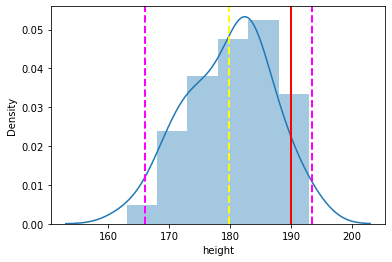

In [4]:
import random 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取档案
df = pd.read_csv('./data/president_heights.csv')
df.rename(columns={df.columns[-1]:'height'}, inplace=True)

# 计算信赖区间
m = df['height'].mean()
sd = df['height'].std()
print(f'平均数={m:.2f}, 标准差={sd:.2f}, ' + 
      f'信赖区间=({m-1.96*sd:.2f}, {m+1.96*sd:.2f})')

sns.distplot(df['height'])
plt.axvline(m, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(m-1.96*sd, color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(m+1.96*sd, color='magenta', linestyle='dashed', linewidth=2)

# 川普的身高190公分
plt.axvline(190, color='red', linewidth=2)

plt.show()

## 范例2. 要调查顾客是否喜欢公司新上市的食品，公司进行问卷调查，取得客户的评价，范围介于0~10分，平均分数为5分，使用假设检定确认。

## t统计量:
### $\begin{equation}t = \frac{\bar{x} - \mu}{s \div \sqrt{n}} \end{equation}$
    

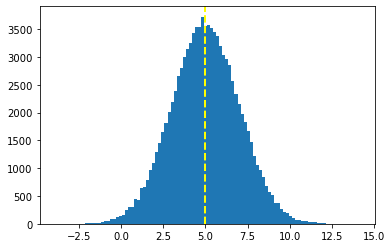

In [5]:
import numpy as np
import matplotlib.pyplot as plt

pop_mean = 5   # 母体平均数
pop_std = 2    # 母体标准差

pop = np.random.normal(pop_mean, pop_std, 100000) # 产生 100000 笔

plt.hist(pop, bins=100)   # 画直方图

# 画平均数
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

最小值:1, 最大值:9, 平均数:5.46


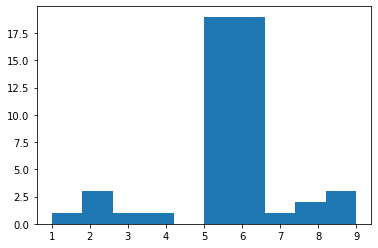

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 问卷调查，得到客户的评价
np.random.seed(123)
lo = np.random.randint(0, 5, 6)    # 0~4分  6笔
mid = np.random.randint(5, 7, 38)  # 5~6分 38笔
hi = np.random.randint(7, 11, 6)   # 7~10分 6笔
sample = np.append(lo,np.append(mid, hi))

print(f"最小值:{sample.min()}, 最大值:{sample.max()}, 平均数:{sample.mean()}")

plt.hist(sample)   # 画直方图
plt.show()

t统计量:2.0250, p值:0.0242


C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


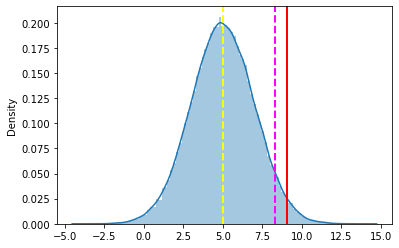

In [7]:
from scipy import stats
import seaborn as sns

# t检定，scipy 需 v1.6.0 以上才支援 alternative
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
t,p = stats.ttest_1samp(sample, 5, alternative='greater')
print(f"t统计量:{t:.4f}, p值:{p:.4f}")

# 单尾检定，右尾显著水准 5%，故取信赖区间 90%，两边各 5%
ci = stats.norm.interval(0.90, pop_mean, pop_std)
sns.distplot(pop, bins=100)

# 画平均数
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

# 画右尾显著水准
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)

# 画t统计量
plt.axvline(pop.mean() + t*pop.std(), color='red', linewidth=2)

plt.show()

In [8]:
# 载入套件
import scipy.integrate as integrate

# 平均数(mean)、标准差(std)
mean = 0
std = 1
# 常态分配的机率密度函数(Probability Density Function, pdf)
f = lambda x: (1/((2*np.pi*std**2) ** .5)) * np.exp(-0.5*((x-mean)/std)**2) 

# 90%信赖区间之机率
i, e = integrate.quad(f, -1.645, 1.645)

print('累积机率:', round(i, 3))
print('误差:', str(e))

累积机率: 0.9
误差: 7.402606925806481e-14


## 双样本检定(Two-Sample Test)
### 范例3. 要检定新药有效性，将实验对象分为两组，一组为实验组(Treatment Group)，让他们服用新药，另一组为对照组，又称控制组(Control Group)，让他们服用安慰剂，检验两组疾病复原状况是否有明显差异。

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(123)
Control_Group = np.random.normal(66.0, 1.5, 100)
Treatment_Group = np.random.normal(66.55, 1.5, 200)
print(f"控制组平均数:{Control_Group.mean():.2f}")
print(f"实验组平均数:{Treatment_Group.mean():.2f}")

控制组平均数:66.04
实验组平均数:66.46


t统计量:2.2390, p值:0.0129


C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


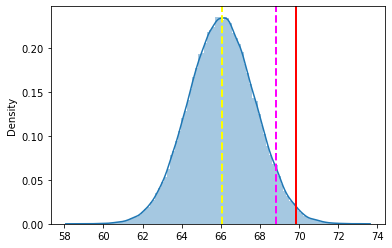

In [10]:
# t检定，scipy 需 v1.6.0 以上才支援 alternative
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
t,p = stats.ttest_ind(Treatment_Group, Control_Group, alternative='greater')
print(f"t统计量:{t:.4f}, p值:{p:.4f}")

# 单尾检定，右尾显著水准 5%，故取信赖区间 90%，两边各 5%
pop = np.random.normal(Control_Group.mean(), Control_Group.std(), 100000)
ci = stats.norm.interval(0.90, Control_Group.mean(), Control_Group.std())
sns.distplot(pop, bins=100)

# 画平均数
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

# 画右尾显著水准
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)

# 画t统计量
plt.axvline(pop.mean() + t*pop.std(), color='red', linewidth=2)

plt.show()

## 配对检定(Paired Tests)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(123)
midTerm = np.random.normal(60, 5, 100)
endTerm = np.random.normal(61, 5, 100)
print(f"期中考:{midTerm.mean():.2f}")
print(f"期末考:{endTerm.mean():.2f}")

期中考:60.14
期末考:60.90


t统计量:1.0159, p值:0.1561


C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


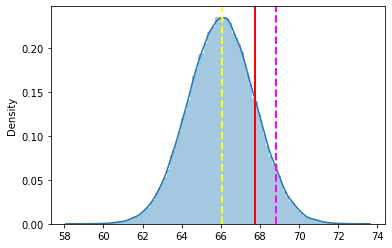

In [12]:
# t检定，scipy 需 v1.6.0 以上才支援 alternative
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
t,p = stats.ttest_rel(endTerm, midTerm, alternative='greater')
print(f"t统计量:{t:.4f}, p值:{p:.4f}")

# 单尾检定，右尾显著水准 5%，故取信赖区间 90%，两边各 5%
pop = np.random.normal(Control_Group.mean(), Control_Group.std(), 100000)
ci = stats.norm.interval(0.90, Control_Group.mean(), Control_Group.std())
sns.distplot(pop, bins=100)

# 画平均数
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

# 画右尾显著水准
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)

# 画t统计量
plt.axvline(pop.mean() + t*pop.std(), color='red', linewidth=2)

plt.show()